In [ ]:
# load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [3]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier


In [4]:
import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load the dataset
df = pd.read_csv("Data_TarImp_CleanOutlier.csv")

In [9]:
print(df.head())

   Unnamed: 0 Current Status  Gender      Education Occupation Account type  \
0           0         Active    Male       Graduate   Salaried      Savings   
1           1         Active    Male  Post Graduate   Salaried      Savings   
2           2        Dormant    Male  Post Graduate   Salaried     Salaried   
3           3         Active    Male       Graduate    Student      Savings   
4           4         Active  Female       Doctrate   Business      Savings   

  Have minimum balance? Have multiple accounts? Own an active loan?  \
0                   Yes                     Yes                  No   
1                   Yes                     Yes                 Yes   
2                   Yes                     Yes                 Yes   
3                   Yes                     Yes                  No   
4                    No                     Yes                 Yes   

  Use internet or mobile banking? Has an active credit Card?  \
0                             Yes 

In [10]:
print (df.info())
print (df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             1091 non-null   int64  
 1   Current Status                         1091 non-null   object 
 2   Gender                                 1091 non-null   object 
 3   Education                              1091 non-null   object 
 4   Occupation                             1091 non-null   object 
 5   Account type                           1091 non-null   object 
 6   Have minimum balance?                  1091 non-null   object 
 7   Have multiple accounts?                1091 non-null   object 
 8   Own an active loan?                    1091 non-null   object 
 9   Use internet or mobile banking?        1091 non-null   object 
 10  Has an active credit Card?             1091 non-null   object 
 11  Ever

In [ ]:
# drop unnecesaary columns
df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
# remove invalid values
df = df[df["Current balance"] >= 0]
df = df[df["Months since last transaction"] >= 0]

In [ ]:
# encode categorical columns
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

In [17]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [18]:
# Split features and target
X = df.drop(columns = ["Current Status"])
y = df["Current Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
# define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Network": MLPClassifier(max_iter=1000),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [20]:
# Train and evaluate models 
results = []
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc))
    print(f"\n🔹 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    print("-" * 50)
    if acc > best_score:
        best_score = acc
        best_model = model


🔹 Logistic Regression Accuracy: 0.8585
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       137
           1       0.72      0.81      0.77        54
           2       0.70      0.33      0.45        21

    accuracy                           0.86       212
   macro avg       0.78      0.70      0.72       212
weighted avg       0.85      0.86      0.85       212

--------------------------------------------------

🔹 Decision Tree Accuracy: 0.8726
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       137
           1       0.79      0.81      0.80        54
           2       0.75      0.71      0.73        21

    accuracy                           0.87       212
   macro avg       0.82      0.82      0.82       212
weighted avg       0.87      0.87      0.87       212

--------------------------------------------------

🔹 Random Forest Accuracy: 0.9387
              precision    r

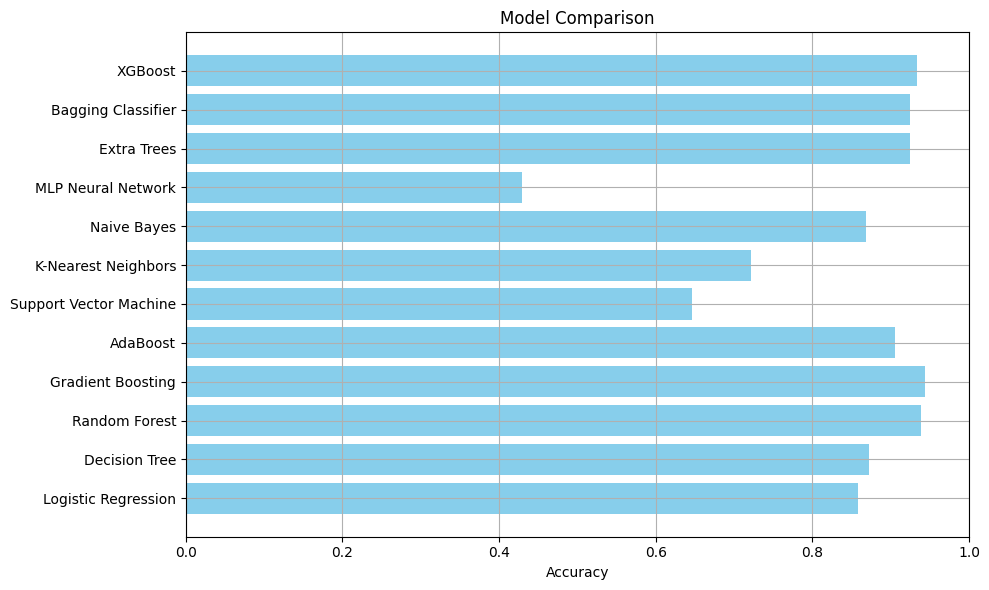

In [21]:
# Visualize Results 
model_names = [x[0] for x in results]
accuracies = [x[1] for x in results]

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.xlim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# save the best model for deployment 
joblib.dump(best_model, "best_model.pkl")
print(f"Best model ({best_model.__class__.__name__}) saved as 'best_model.pkl'")

Best model (GradientBoostingClassifier) saved as 'best_model.pkl'
